# Physics 404/604

## Computational Physics (Spring 2018)

## BPB-250, Mon./Wed. 2:30-3:45 pm

| Instructor | Prof. Zhaohuan Zhu                 |
| ---------- | :--------------------------------- |
| Email      | zhaohuan.zhu@unlv.edu              |
| Website    | http://www.physics.unlv.edu/~zhzhu |
| Office     | BPB 245                            |

# Partial Differential Equations (PDEs)

\begin{equation}
A\frac{\partial^2 U(x,y)}{\partial x^2}+2B\frac{\partial^2 U(x,y)}{\partial x\partial y}+C\frac{\partial^2 U(x,y)}{\partial y^2}+D\frac{\partial U(x,y)}{\partial x}+E\frac{\partial U(x,y)}{\partial y}=F
\end{equation}

|*     Elliptic     * | *      Parabolic   * | *   Hyperbolic   * |
|----|----|----| 
|$d=AC-B^2>0$|$d=AC-B^2=0$|$d=AC-B^2<0$|
|$\nabla^2 U(x) = -4\pi\rho(x)$|$\nabla^2 U(\mathbf{x},t) =a \partial U/\partial t$|$\nabla^2 U(\mathbf{x},t)=c^{-2}\partial^2 U/\partial t^2\mbox{}$  |
| Poisson's | Heat | Wave|

Elliptic equation: second-order derivatives of all the variables, but having the same sign when placed on the same side  
Parabolic equation: a first-order derivative in one variable and a second-order derivative in the other  
Hyperbolic equation: equation: second-order derivatives of all the variables, but having the opposite signs when placed on the same side  

To uniquely determine the solution, needs special boundary/initial condition.

## Elliptic Equation:
Left: The shaded region of space within a square in which we determine the electric potential by solving Laplace's equation. There is a wire at the top kept at a constant 100 V and a grounded wire (dashed) at the sides and bottom. Right: The computed electric potential as a function of x and y. The projections onto the shaded xy plane are equipotential (contour) lines. (Landau Textbook)

![From textbook](http://physics.oregonstate.edu/~landaur/Books/CPbook/eBook/Notebooks/HTML/Figs/Fig19_1.png)

### Jacobi method

In [1]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""
   
# LaplaceLine.py:  Solve Laplace's eqtn, 3D matplot, close shell to quit


import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D
from numpy import *;
import numpy;
print("Initializing")
Nmax = 100; Niter = 7000; V = zeros((Nmax, Nmax), float); du = zeros((Nmax, Nmax), float)

for k in range(0, Nmax):  V[k,0] = 100.0              # Line at 100V
    
for iter in range(Niter):                                  
    if iter%10 == 0: print(iter)
    maxerr=0.
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1): 
            du[i,j] = 1./4.*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])-V[i,j]
            if(maxerr<abs(du[i,j])):
                maxerr=abs(du[i,j])
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1):    
            V[i,j] = V[i,j] + du [i,j]               # get the new V[i,j]
    print(maxerr)
    if(maxerr<1.e-3):
        break
            
x = range(0, Nmax, 1)
y = range(0, Nmax, 1)                              
X, Y = p.meshgrid(x,y)                 

def functz(V):                                         # V(x, y) 
    z = V[X,Y]                        
    return z

Z = functz(V)                          
fig = p.figure()                                      # Create figure
ax = Axes3D(fig)                                      # Plot axes
ax.plot_wireframe(X, Y, Z, color = 'r')               # Red wireframe
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
p.show()                                              # Show fig

Initializing
0
25.0
12.5
7.8125
5.46875
4.6875
4.0283203125
3.4912109375
3.0548095703125
2.69775390625
2.4026870727539062
10
2.1562576293945312
1.9483327865600586
1.826561987400055
1.7142333090305328
1.6110618598759174
1.5164853539317846
1.4298290479928255
1.350394100882113
1.277503510209499
1.2105244259146275
20
1.1488773486689752
1.0920381535242996
1.0395363192202467
0.990951288427766
0.95678055434405
0.9241630354459573
0.8930551632850836
0.8634029410666315
0.8351461175408161
0.8082211578689709
30
0.7825633433334467
0.7581082388542733
0.7347927012194262
0.7125555536825274
0.6913380185852773
0.6710839750720439
0.6517400910899198
0.6332558658174108
0.6155836090969231
0.5986783774077153
40
0.5856636300727587
0.573034310850371
0.5607819324933736
0.5488972290574878
0.5373703872472824
0.5261912328497367
0.5153493805245404
0.5048343536731146
0.49463567986153834
0.4847429662643066
50
0.47514595878003973
0.4658345878073078
0.45679900313000843
0.44802959992222213
0.4395170375237001
0.431252252

0.05762436080104294
0.057481733939674484
420
0.05734887104241082
0.05721613022495475
0.05708429900488099
0.05695242284030755
0.056821458340799325
0.05669044082431185
0.056560336998781935
0.056430172123253186
0.05630092292320299
0.05617160468170823
430
0.0560432040592822
0.055914726447479524
0.05578716835777442
0.055659525376203334
0.05553280377956682
0.05540598943576214
0.05528009829988534
0.05515410661048392
0.05502903991242647
0.05490386490505017
440
0.054779616633194195
0.05465525234831503
0.05453181650410954
0.054408256996786974
0.05428562759653488
0.054162866938032295
0.05404103801447846
0.05391907029384413
0.05379803589772081
0.0536768552232445
450
0.05355660942472085
0.053436209925312284
0.05331674681536569
0.053197122641869043
0.0530784363335961
0.052959581660012134
0.05284166628982234
0.0527235753144879
0.0526064250432583
0.05248909198989793
460
0.052372701004081534
0.05225612012286973
0.052140482635465446
0.05202464820398944
0.0519097584555368
0.051794664779649224
0.051680517

0.02868796925333328
0.028649372052498734
820
0.02861013179057892
0.028571670623264822
0.028532567400908704
0.028494241744184023
0.028455275049175555
0.028417084381111124
0.028378253702044276
0.028340197501698583
0.028301502327963135
0.028263580075481798
830
0.028225019897362813
0.02818723107390042
0.02814880538258535
0.02811114947041915
0.028072857758004943
0.028035334240541943
0.027997176000070567
0.02795978436184754
0.027921759087355724
0.027884498814088943
840
0.02784874492520828
0.02781252516491506
0.02777706001456437
0.02774095586422476
0.027705604861573363
0.02766961597536266
0.027634378765398537
0.027598504796898737
0.027563381024236833
0.027527621626514787
850
0.027492610935400563
0.02745696576101153
0.027422067795406235
0.027386536496443625
0.027351750900034943
0.027316333128180048
0.02728165954442119
0.027246354950978713
0.027211793023116826
0.027176601259064626
860
0.027142150630190542
0.027107071346179623
0.02707273165927404
0.027037764505692508
0.027003535403636647
0.02696

0.018243290901757803
0.018224742068277067
1210
0.01820664697223151
0.018188142855390055
0.018170091153134393
0.01815163165498035
0.01813362325088974
0.018115208273350447
0.018097243071689917
0.018078872516589684
0.01806095042153899
0.01804262419057423
1220
0.018024745106234974
0.01800646310100973
0.017988626931376928
0.01797038905341708
0.017952595702407592
0.01793440185312889
0.017916651224599178
0.017898501305342762
0.017880793303067577
0.01786268721509643
1230
0.01784502174278657
0.017826959387278407
0.01780933634860915
0.01779131762667774
0.017773736925242645
0.01775576173794491
0.017738223277294907
0.01772029152562027
0.017702795209277866
0.017684906794158906
1240
0.017667452525586214
0.017649607347919982
0.01763219503055069
0.017614392991184502
0.017597022528420325
0.017579263528162414
0.0175619348233802
0.017544218762992614
0.017526931719551442
0.01750925849977847
1250
0.017492013021016106
0.01747438254257716
0.017457178531810058
0.01743959069539258
0.017422428055947847
0.017404

0.012740944167322965
0.012729913818951388
0.012719133667879134
0.012708126134903353
0.012697368041273194
1600
0.0126863832762254
0.01267564719473313
0.012664685150156174
0.012653971035533118
0.012643031664026694
0.012632339471004173
0.01262142272517508
0.012610752408548365
0.012599858241049589
0.012589209755621056
1610
0.012578338119134003
0.012567711419741556
0.012556862266990265
0.01254625730850023
0.012535430592240715
0.012524847329565603
0.01251404300258585
0.012503481390645277
0.012492699405775909
0.012482159399549886
1620
0.012471399709653497
0.012460881264143353
0.012450143822135828
0.012439646892367762
0.012429412575354348
0.012418975878830452
0.012408777838384566
0.012398361711145611
0.012388183527111352
0.012377787930674344
1630
0.012367629566604421
0.012357254462479261
0.012347115881890858
0.012336761231598103
0.01232664239800485
0.012316308163050849
0.012306209039955718
0.012295895181843264
0.01228581573275278
0.012275522212995327
1640
0.012265462401398253
0.012255189181487

0.00937577726216432
0.009368799616243706
0.009361821457325448
0.009354872605594977
0.009348062703296023
0.009341125912357029
0.009334327669392906
0.009327402918355432
0.009320616315001473
1990
0.009313703582986221
0.009306928599528419
0.00930002786565609
0.009293264482387542
0.009286375725800156
0.00927962392301751
0.009272747122867742
0.009266006880892519
0.00925914201634015
0.009252413315472552
2000
0.009245560365695127
0.009238843186281542
0.00923200213046016
0.009225296452818554
0.009218467270169839
0.009211773074646601
0.009204955744369414
0.009198273011325142
0.00919146751265032
0.009184796222452718
2010
0.009178002534614649
0.009171342667634974
0.009164560769889363
0.009157912306520188
0.009151142178126292
0.009144505098763744
0.009137746719009243
0.009131121004053
0.009124374352232678
0.009117759982107287
2020
0.00911102503753014
0.009104421992667255
0.00909769873465649
0.009091106995498421
0.009084395403391454
0.00907781495038762
0.00907111500355029
0.009064545817171421
0.0090

0.007139692763853844
0.007134922084912176
2370
0.007130079102736886
0.007125315936626464
0.007120480677492935
0.00711572501154123
0.0071108974621481025
0.007106149283725216
0.007101329430792447
0.007096588727254272
0.007091776557540896
0.007087043316264641
2380
0.007082316619285933
0.007077601605946171
0.007072965006216236
0.007068257267373923
0.007063627725315769
0.00705892724926116
0.007054304753772556
0.007049611528774591
0.0070449960687639646
0.007040310083130663
2390
0.007035701647509995
0.007031022889556482
0.007026421467244859
0.007021749925282705
0.007017155505209871
0.007012491167571966
0.007007903738685428
0.00700324659371887
0.0069986661449590315
0.006994016181014473
2400
0.006989442701343052
0.006984799906785355
0.006980233385167622
0.006975597748379414
0.006971038173784194
0.0069664096831481
0.006961857044572639
0.006957235688485497
0.006952689974923487
0.006948075741796345
2410
0.006943536942245032
0.006938929820499595
0.006934397923981095
0.006929797902046175
0.006925272

0.005587618005925776
0.0055842029560650985
0.005580745703746004
0.0055773354531893915
0.005573883118596967
0.00557047766002583
0.005567030235503978
0.00556362956159262
0.005560187039485243
2760
0.005556791142929285
0.005553353515587389
0.005549962389096663
0.005546529648885468
0.005543143285162699
0.005539715424454528
0.005536333816220207
0.005532910827408699
0.005529533967379763
0.005526115842851453
2770
0.00552274372377326
0.005519330455932447
0.0055159630705432505
0.005512554651804891
0.005509191992860707
0.005505788415639756
0.005502430475900155
0.005499031732632886
0.005495678504871648
0.005492284587994334
2780
0.005488936064988792
0.0054855469669483625
0.005482203141490061
0.005478818854758316
0.0054754797196245875
0.005472100236673327
0.0054687657846841375
0.005465391097981609
0.005462061321949818
0.005458691423985584
2790
0.005455366316734711
0.005452001200012546
0.005448680754366109
0.0054453204113933396
0.0054420046201961725
0.00543864904349789
0.0054353378995841695
0.0054319

0.004457265039604863
0.004454696263991309
0.004452102453718965
0.00444953701136086
0.004446946603152924
0.004444384489232789
0.004441797478076381
0.004439238687798053
0.004436655068705164
3140
0.0044340995972582675
0.004431519365240888
0.0044289672078434705
0.00442639035791359
0.004423841509776594
0.004421296812537889
0.004418758422087166
0.004416247862256029
0.0044137127152446
0.004411205327105705
3150
0.0044086734189754395
0.0044061691981660545
0.004403640524365926
0.004401139466519766
0.004398614022509406
0.004396116123267291
0.004393593904509885
0.004391099159533951
0.004388580161489131
0.004386088566420199
3160
0.004383572784565359
0.004381084335072671
0.0043785717648852085
0.004376086456627348
0.004373577093581105
0.004371094922241525
0.00436858876183166
0.004366109723068945
0.00436360676079417
0.004361130850298878
3170
0.0043586310816436935
0.00435615829510283
0.004353661715580159
0.004351192048677177
0.004348698653807048
0.004346232102236058
0.004343741887524288
0.0043412784469

0.003596059976732846
0.003594087759243081
0.003592132856418573
0.003590162984259848
0.0035882103832420853
0.0035862428533448565
0.0035842925511815338
3520
0.0035823273604869144
0.0035803793542150686
0.0035784164996570667
0.0035764707863421563
0.00357451026485478
0.0035725668415622636
0.0035706086500937317
0.0035686675138677515
0.003566711649369836
0.003564772797279403
3530
0.003562819256718086
0.0035608826858144482
0.0035589314661450544
0.003556997173507881
0.0035550482716892873
0.0035531162543982475
0.0035511696673964366
0.0035492399225098836
0.0035472956472979433
0.0035453681719204155
3540
0.0035434262054643284
0.0035415009966612843
0.0035395613359447964
0.0035376383908172215
0.003535701032824079
0.0035337803484445374
0.0035318452901584863
0.003529926863635069
0.0035279941020505134
0.0035260779304664425
3550
0.003524147462577787
0.0035222335430518115
0.0035203053658463546
0.003518393695468802
0.003516467805955159
0.003514558381844779
0.0035126347770209065
0.0035107275962893425
0.0035

0.002941979952446161
0.002940417570759024
0.0029388461025909862
0.0029372854863822795
0.002935715808256134
3890
0.0029341569553409386
0.0029325890650255815
0.0029310319732260837
0.0029294658684655417
0.0029279105356216917
0.002926346214181308
0.0029247926381117395
0.002923230097756857
0.0029216782763015203
0.0029201175147974823
3900
0.002918567445789222
0.002917008460904924
0.0029154601421765847
0.002913902931702239
0.0029123563610831127
0.0029108009227876153
0.0029092560981460736
0.00290770242979832
0.002906159348963655
0.0029046074483538575
3910
0.0029030661091873355
0.0029015159740914953
0.002899976374440172
0.002898428002662712
0.0028968901403736425
0.0028953435296976693
0.0028938074026285676
0.002892262550851399
0.0028907281568706367
0.0028891850617789316
3920
0.002887652398751328
0.0028861110581530625
0.0028845801239327784
0.002883040535635928
0.0028815113280877824
0.0028799734899003226
0.0028784460069068984
0.002876909916622594
0.0028753841560593685
0.002873849811493301
3930
0.0

0.0024192346721498836
0.002417981805631797
0.0024167234224741208
4260
0.0024154719009175096
0.002414214877735077
0.002412964699615827
0.002411709034831233
0.0024104601986394414
0.0024092058906717284
0.002407958394876175
0.0024067054421834655
0.0024054592852351675
0.00240420768625782
4270
0.002402962866657532
0.0024017126198181415
0.002400469136038197
0.0023992202397877804
0.002397978090314723
0.002396730543082981
0.0023954897264033548
0.0023942435266519624
0.0023930040412345477
0.002391759187400311
4280
0.002390521031749415
0.0023892775222762452
0.0023880406948784128
0.0023867985282279847
0.0023855630275662065
0.0023843222021824317
0.00238308802675391
0.002381848541094911
0.0023806156893897423
0.002379377541913641
4290
0.002378146012425475
0.002376909201586841
0.0023756789928270905
0.0023744435170804934
0.002373214627542808
0.0023719804853534754
0.0023707529135279515
0.0023695201033682167
0.00236829384776982
0.0023670623680942526
4300
0.002365837427223738
0.0023646072765011183
0.002363

0.0019930920600508273
0.001992071783998739
0.001991048201432477
0.0019900289938874494
0.0019890064889906967
0.0019879883487874395
0.0019869669203629314
0.001985949846346813
4640
0.0019849294932043904
0.001983913484203015
0.0019828942051596243
0.001981879260014807
0.001980861053876737
0.001979847171437399
0.0019788300370287004
0.001977817216125999
0.001976801152256513
0.0019757893917322633
4650
0.001974774397229595
0.001973763695929165
0.0019727497696067076
0.001971740126379018
0.0019707272670572706
0.001969718680740584
0.001968706887250704
0.0019676993567045997
0.001966688627852875
0.0019656821519156153
4660
0.0019646724865545195
0.0019636670640750253
0.0019626584610108466
0.001961654090848697
0.0019606465489090397
0.001959643229913155
0.0019586367479433875
0.001957634478959136
0.00195662905578331
0.0019556278356844814
4670
0.001954623470119543
0.0019536232977515056
0.001952619988657034
0.0019516208628722609
0.0019506186090723077
0.0019496205287339308
0.0019486193290596532
0.0019476222

0.0016477853678829035
0.0016469461022197152
0.0016461096674795783
0.0016452712686820803
0.001644435694302615
0.0016435981614506545
5010
0.001642763446511708
0.0016419267786886849
0.0016410929222949733
0.0016402571185700765
0.0016394241198085524
0.00163858917927584
0.0016377570372547723
0.0016369229589834333
0.0016360916727897745
0.0016352584558667616
5020
0.0016344280246052278
0.0016335956681174935
0.0016327660908750374
0.001631934593913087
0.0016311058698050829
0.0016302752314345526
0.001629447359562164
0.0016286175788842172
0.001627790558341502
0.0016269616344430915
5030
0.0016261354643347659
0.0016253073963028442
0.0016244820757336242
0.0016236548626586966
0.0016228303907368513
0.0016220040317165285
0.0016211804075361158
0.0016203549016573504
0.0016195321243337446
0.001618707470687042
5040
0.0016178855393356173
0.0016170617370150353
0.00161624065072985
0.0016154176988401048
0.0016145974567365329
0.0016137753543645772
0.0016129559555615458
0.0016121347017978849
0.0016113161454072156


0.0013653706283811573
0.0013646770466664293
0.0013639853233122778
0.0013632924541369107
0.0013626014391618924
0.0013619092817727108
5380
0.001361218974427203
0.001360527528078137
0.0013598379276231753
0.0013591471915610498
0.0013584582972612225
0.001357768270732862
0.0013570800818527573
0.0013563907641156447
0.00135570327990564
0.0013550146702101529
5390
0.0013543278899454947
0.0013536399875491156
0.0013529539104872867
0.0013522667146368406
0.0013515813400424292
0.0013508948500131623
0.001350210177136546
0.0013495243921717304
0.0013488404203023663
0.0013481553396523793
5400
0.0013474720680477503
0.001346787690980733
0.00134610511890898
0.0013454214446824153
0.001344739571404574
0.0013440565992794973
0.0013433754240743667
0.0013426931533047082
0.0013420126754368766
0.0013413311052907773
5410
0.0013406513240354911
0.0013399704537704338
0.001339291368395834
0.0013386111972693016
0.0013379328070612928
0.0013372533343414261
0.0013365756385574912
0.0013358968635124313
0.0013352198614278166
0

0.001132218078769398
0.0011316464825377182
0.0011310742344541325
0.0011305032178725583
0.0011299315515174158
0.0011293611139997495
5750
0.0011287900287761943
0.0011282201697220273
0.0011276496650296508
0.0011270803838492327
0.001126510459091179
0.001125941755198312
0.0011253724097741724
0.0011248042825755533
0.0011242355158920248
0.0011236679648014558
5760
0.001123099776254577
0.0011225328006752022
0.001121965189682328
0.0011213987890279498
0.0011208317549886715
0.0011202659286695393
0.0011196994709905539
0.00111913421842047
0.001118568336512027
0.0011180036571012408
5770
0.0011174383503629315
0.0011168742435287982
0.0011163095113744248
0.0011157459765271938
0.0011151818183634532
0.0011146188549204794
0.0011140552701576212
0.0011134928775362596
0.0011129298655774278
0.0011123680431914806
5780
0.0011118056034611357
0.001111244350713747
0.0011106824826185857
0.0011101217989413215
0.0011095605018915933
0.0011090003867018083
0.0011084396601006574
0.0011078801128192595
0.0011073199560840408

<Figure size 640x480 with 1 Axes>

In [2]:
%matplotlib inline

### Gauss-Siedel

Initializing
0
33.33333333333333
14.814814814814817
8.230452674897116
5.97469897881421
4.755372656607221
3.8792641139844264
3.2339745459358014
2.8323922744313066
2.537593204059995
2.2865835537121484
10
2.0719452437276047
1.8873570089078058
1.727622312918669
1.6081639675854973
1.5097867825048787
1.4201050990127797
1.3382668252802077
1.263474157181065
1.1949984474023907
1.1321838167748624
20
1.0744449378204735
1.0274462085867455
0.9865043248112819
0.9479352988737375
0.9115894482778018
0.8773216092305418
0.8449930857260313
0.8144727265391225
0.7856374188891948
0.7583721968531236
30
0.732570100502393
0.7105402958053517
0.6907184295676245
0.6717044066181757
0.6534627384372556
0.6359585128099425
0.6191576863390864
0.6030272865051458
0.5875355450838171
0.572651979665693
40
0.558347436147983
0.5445941020967453
0.5313654985947025
0.5197234093154641
0.5090290925694667
0.49865733088055464
0.48859768459458053
0.4788398174728101
0.4693735501829366
0.46018890154364556
50
0.45127611976580795
0.442625

0.05607054800950806
0.05591955165790807
410
0.05576908253124202
0.05561913860778134
0.0554697178701673
0.05532081830549629
0.055172437905518734
0.055024574666546755
0.05487722658969574
0.05473039168088434
0.05458406795093396
0.05443825341563979
420
0.05429294609588453
0.05414814401761703
0.05400665201749888
0.053868799213120155
0.05373138770694652
0.05359441609699189
0.05345788298097531
0.05332178695646306
0.05318612662095745
0.05305090057204609
430
0.05291610740747643
0.052781745725326346
0.05264781412405384
0.052514311202642716
0.0523812355606843
0.05224858579848757
0.05211636051718216
0.05198455831881077
0.051853177806410855
0.05172221758414608
440
0.051591676257313424
0.05146155243253503
0.05133184471777952
0.05120255172243304
0.05107367205740587
0.05094520433524963
0.05081714717013597
0.050689499178020014
0.05056225897666877
0.0504354251857535
450
0.05030899642686393
0.05018297132369298
0.05005734850194443
0.049932126589546044
0.04980730421659274
0.049682880015488706
0.04955885262

0.024463381224332892
0.024421875561454698
810
0.02438045509814657
0.02433911965340485
0.02429786904643194
0.024256703096579457
0.02421562162341928
0.024174624446700932
0.02413371138635867
0.024092882262539916
0.024052324229675293
0.024012656171937152
820
0.023973065837903818
0.023933553078638425
0.023894117745289378
0.023854759689022842
0.023815478761047615
0.02377627481261868
0.023737147695044314
0.023698097259703843
0.023659123358001466
0.023620225841423093
830
0.02358140456150437
0.023542659369852004
0.0235039901181473
0.023465396658135518
0.02342687884163297
0.023388436520530576
0.023350069546822283
0.023311777772548226
0.023273561049862224
0.023235419230992704
840
0.023197352168260466
0.02315935971407157
0.02312144172094932
0.02308359804148452
0.02304582852840298
0.02300813303449445
0.02297051141268014
0.022932963515984284
0.022895489197534147
0.022858088310581337
850
0.02282076070846628
0.022783506244682172
0.022746324772811022
0.022709216146559186
0.022672180219785787
0.02263521

0.013691739444649187
1200
0.013673445613470392
0.0136551806371088
0.013637122640190569
0.013619231193011672
0.0136013670887003
0.013583530282929246
0.013565720731428144
0.013547938389976366
0.013530183214381708
0.013512455160523018
1210
0.013494754184296909
0.013477080241667494
0.013459433288645073
0.013441813281279025
0.013424220175661361
0.013406653927955148
0.013389114494334109
0.013371601831060786
0.013354115894415486
0.013336656640746014
1220
0.013319224026421495
0.013301818007896316
0.01328443854165684
0.013267085584232063
0.013249759092190061
0.013232459022194831
0.013215185330903267
0.01319793797506108
0.013180716911445955
0.013163522096881763
1230
0.013146353488274087
0.013129211042539168
0.013112094716653644
0.013095004467665206
0.013077940252657072
0.0130609020287622
0.013043889753159732
0.013026903383110522
0.01300994287588253
0.012993008188825428
1240
0.012976099279335074
0.012959216104849958
0.012942358622876071
0.01292552679095138
0.012908720566688459
0.01289193990774251

0.00851913372617119
0.008509323964879911
0.008499526918402722
0.00848974256814472
1590
0.008479970895574951
0.008470211882151801
0.008460465509390502
0.008450810970142442
0.008441210792309306
0.008431622746613243
0.008422046816086493
0.008412482983771952
0.008402931232751598
0.00839339154610741
1600
0.008383863906960443
0.008374348298435308
0.008364844703699248
0.008355353105923058
0.008345873488309508
0.008336405834082683
0.008326950126480881
0.00831750634877082
0.008308074484240535
0.00829865451618872
1610
0.008289246427967356
0.008279850202892902
0.008270465824370632
0.008261093275773845
0.00825173254052558
0.008242383602059533
0.008233046443841374
0.008223721049347432
0.008214407402078905
0.008205105485558306
1620
0.008195815283333019
0.008186536778971742
0.008177269956064492
0.00816801479820839
0.008158771289050293
0.008149539412229956
0.008140319151440423
0.008131110490360527
0.00812191341271884
0.008112727902251038
1630
0.00810355394272122
0.008094391517904143
0.0080852406116136

0.005583672812136342
0.005577745281474478
0.005571824438341366
0.005565910274416552
0.005560002781439977
0.005554101951137369
0.005548207775262881
0.005542320245560006
0.00553643935381487
1980
0.005530565091792283
0.005524697451281924
0.005518836424084128
0.005512982002016997
0.005507134176887973
0.005501292940543578
0.0054954582848196765
0.005489630201566342
0.0054838086826620724
0.0054779937199676
1990
0.005472185305382737
0.005466383430793087
0.0054605880881091196
0.005454799269255517
0.005449016966156961
0.00544324117075945
0.005437471875001876
0.005431709070855106
0.0054259527502900085
0.005420202905295213
2000
0.005414459527855797
0.005408722609971051
0.005402992143672236
0.0053972681209728535
0.005391550533914824
0.005385839374536516
0.005380134634911826
0.005374436307093333
0.005368744383165591
0.005363058855216707
2010
0.00535737971535255
0.005351706955671887
0.005346040568301902
0.005340380545376888
0.005334726879041796
0.005329079561430916
0.005323464718426152
0.005317874120

0.003747531578301988
0.0037436942569186726
0.0037398609531891225
0.0037360316627186307
0.0037322063811160433
0.003728385104004417
2360
0.0037245678270139138
0.003720754545764038
0.003716945255888504
0.0037131399530316855
0.0037093386328308497
0.0037055412909339225
0.003701747922995935
0.0036979585246790236
0.003694173091648878
0.003690391619564082
2370
0.00368661410409743
0.003682840540946586
0.0036790709257736864
0.003675305254279948
0.0036715435221523762
0.003667785725099293
0.003664031858804151
0.0036602819189965885
0.0036565359013849275
0.0036527938016810424
2380
0.0036490556156145715
0.0036453213389116
0.003641590967308872
0.0036378644965289197
0.003634141922344014
0.003630423240473135
0.0036267084466921062
0.0036229975367412237
0.003619290506396311
0.0036155873514225334
2390
0.0036118880675815035
0.003608192650670361
0.003604501096457824
0.003600813400726821
0.003597129559288703
0.003593449567922846
0.003589773422437048
0.003586101118646212
0.003582432652351031
0.0035787680193699

0.0025494265355057166
0.0025468418099876544
0.0025442597312235193
0.0025416802964315366
0.002539103502858353
0.002536529347732852
0.0025339578282910225
0.002531388941779511
2740
0.0025288226854449647
0.0025262590565304777
0.002523698052279144
0.0025211396699589272
0.002518583906812921
0.002516030760109089
0.002513480227108289
0.002510932305074931
0.002508386991273426
0.0025058442829859473
2750
0.002503304177466248
0.002500766672014265
0.002498231763901515
0.0024956994504066188
0.002493169728818856
0.0024906425964310586
0.0024881180505289535
0.002485596088416031
0.002483076707378018
0.00248055990472551
2760
0.0024780456777584448
0.002475534023787418
0.002473024940112367
0.002470518424058099
0.002468014472942315
0.002465513084064952
0.0024630142547579226
0.0024605179823531387
0.0024580242641683014
0.0024555330975388756
2770
0.0024530444797896678
0.002450558408263248
0.002448074880302187
0.0024455938932455012
0.0024431154444251035
0.002440639531208433
0.002438166150930954
0.00243569530096

0.0017498405245284232
0.0017480746836682215
0.0017463106311339516
0.0017445483651172822
0.001742787883774355
0.0017410291852968385
3110
0.0017392722678550854
0.001737517129633659
0.0017357637688242278
0.001734012183590039
0.0017322623721369723
0.0017305143326566963
0.0017287680633266689
0.0017270235623421115
0.001725280827905351
0.001723539858200951
3120
0.001721800651441896
0.0017200632058127496
0.0017183275195336023
0.0017165935907890173
0.001714861417799085
0.0017131309987625798
0.0017114023318924865
0.0017096754154053428
0.0017079502475034758
0.0017062268264105285
3130
0.0017045051503430386
0.0017027852175104385
0.0017010670261470295
0.0016993505744586912
0.001697635860690383
0.0016959228830515372
0.0016942116397800078
0.001692502129099438
0.001690794349244129
0.0016890882984448297
3140
0.0016873839749464992
0.001685681376969228
0.0016839805027650812
0.0016822813505719125
0.0016805839186346816
0.0016788882051983478
0.0016771942084972125
0.0016755019267939986
0.0016738113583336656
0

0.0012034044307682734
0.0012021912846336136
0.0012009793640288535
0.0011997686677318598
0.0011985591944601026
3480
0.0011973509430092122
0.0011961439121215278
0.0011949381005607052
0.0011937335070903998
0.0011925301304707148
0.0011913279694688583
0.0011901270228484861
0.0011889272893803593
0.0011877287678281334
0.0011865314569625696
3490
0.0011853353555544288
0.0011841404623851304
0.001182946776204119
0.0011817542958141303
0.0011805630199788197
0.0011793729474689485
0.001178184077076594
0.0011769964075618589
0.0011758099377345843
0.0011746246663477677
3500
0.001173440592200592
0.001172257714074476
0.0011710760307579449
0.0011698955410359702
0.0011687162436899712
0.0011675381375262361
0.0011663612213155261
0.001165185493867682
0.001164010953964123
0.0011628376004075847
3510
0.0011616654319901443
0.0011604944475003265
0.0011593246457586304
0.0011581560255464751
0.0011569885856594908
0.0011558223249288346
0.001154657242121715
0.0011534933360657362
0.001152330605563634
0.001151169049414591

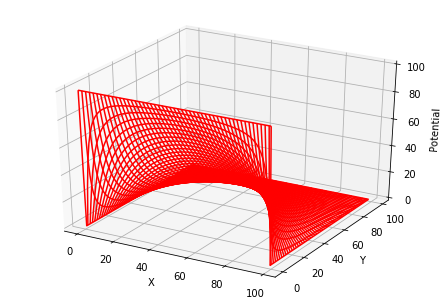

In [8]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""
   
# LaplaceLine.py:  Solve Laplace's eqtn, 3D matplot, close shell to quit


import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D
from numpy import *;
import numpy;
print("Initializing")
Nmax = 100; Niter = 5000; V = zeros((Nmax, Nmax), float)   

for k in range(0, Nmax):  V[k,0] = 100.0              # Line at 100V
    
for iter in range(Niter):                                  
    if iter%10 == 0: print(iter)
    maxerr=0.
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1): 
            du = 1./4.*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])-V[i,j]
            V[i,j] += du
            if(maxerr<abs(du)):
                maxerr=abs(du)
          #  Please finish this session to calculate V and maxerr
    print(maxerr)
    if(maxerr<1.e-3):
        break
            
x = range(0, Nmax, 1)
y = range(0, Nmax, 1)                              
X, Y = p.meshgrid(x,y)                 

def functz(V):                                         # V(x, y) 
    z = V[X,Y]                        
    return z

Z = functz(V)                          
fig = p.figure()                                      # Create figure
ax = Axes3D(fig)                                      # Plot axes
ax.plot_wireframe(X, Y, Z, color = 'r')               # Red wireframe
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
p.show()                                              # Show fig

### SOR

Initializing
0
45.45454545454545
23.481234205313847
16.31176031191881
11.973559976753165
8.974864496390857
6.784599318839234
5.141099406309827
3.8897643284662706
2.9289973277494568
2.187708483592388
10
1.6142285191503092
1.1700921601875791
0.8443594275669746
0.7474837045415441
0.6737405980496831
0.6363904996831309
0.6023785165363407
0.5722693148562001
0.545250800766155
0.5202825741158748
20
0.49796681083477523
0.47754108542739715
0.45845236101960296
0.4410716346311432
0.4250992292384268
0.410037638943642
0.3959467091923159
0.38311099859890163
0.3709146651292414
0.3593111558361173
30
0.3485434890587129
0.33844286063594353
0.328769089352825
0.3194931616152843
0.31084274138317625
0.30261397757673336
0.29467476142500715
0.28700595539842766
0.2797273718177493
0.2728010500045883
40
0.2662209846042103
0.25979905471611175
0.25351933976823915
0.24754733291975128
0.24173997739779907
0.236125532409865
0.23074121721977292
0.22541198981862465
0.22024052488414725
0.21519694398138256
50
0.21044016001

0.004413859197242687
0.004373123238249121
0.004332764308845327
400
0.004292778894175342
0.004253163512679237
0.004213914715897715
0.00417502908804579
0.004136503245707246
0.004098333837518453
0.004060517543962305
0.0040230510767749195
0.0039859311789918195
0.003949154624351081
410
0.00391271821714767
0.0038766187918675143
0.0038408532129317052
0.003805418374408731
0.00377031119962723
0.003735528641026775
0.0037010676797883946
0.0036669253255787737
0.0036330986162269596
0.0035995846175431723
420
0.003566380422988402
0.00353348315337243
0.003500889956633557
0.0034685980075828127
0.0034366045076339446
0.003404906684476572
0.0033735017919624966
0.0033423871097078006
0.0033115599429223153
0.00328101762214672
430
0.0032507575030180647
0.0032207769659962082
0.00319107341614
0.0031616442828727997
0.0031324870197657617
0.0031035991042500655
0.003074978037460596
0.0030466213439162004
0.003018526571409552
0.002990691290669645
440
0.0029631130952125773
0.0029357896010893114
0.0029087184467186944
0

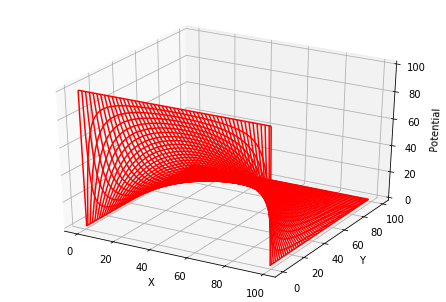

In [7]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""
   
# LaplaceLine.py:  Solve Laplace's eqtn, 3D matplot, close shell to quit


import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D
from numpy import *;
import numpy;
print("Initializing")
omega=1.8
Nmax = 100; Niter = 3000; V = zeros((Nmax, Nmax), float)   

for k in range(0, Nmax):  V[k,0] = 100.0              # Line at 100V
    
for iter in range(Niter):                                  
    if iter%10 == 0: print(iter)
    maxerr=0.
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1): 
            du = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])-V[i,j]
            if(maxerr<abs(du)):
                maxerr=abs(du)
            # Finish this line on updating V[i,j]
            V[i,j] += omega*du
    print(maxerr)
    if(maxerr<1.e-3):
        break
            
x = range(0, Nmax, 1)
y = range(0, Nmax, 1)                              
X, Y = p.meshgrid(x,y)                 

def functz(V):                                         # V(x, y) 
    z = V[X,Y]                        
    return z

Z = functz(V)                          
fig = p.figure()                                      # Create figure
ax = Axes3D(fig)                                      # Plot axes
ax.plot_wireframe(X, Y, Z, color = 'r')               # Red wireframe
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
p.show()                                              # Show fig

## 9 point stencil with SOR

\begin{equation}
\vert \nabla^2 U\vert_{9}=\frac{1}{6h^2}\left(U_{i-1,j+1}+4U_{i,j+1}+U_{i+1,j+1}+4U_{i-1,j}-20U_{i,j}+4U_{i+1,j}+U_{i-1,j-1}+4U_{i,j-1}+U_{i+1,j-1}\right)
\end{equation}

Initializing
Working hard, wait for the figure while I count to 60
0
52.742884375929954
33.125194213031826
17.92429857646487
14.553639176545872
11.088396506323534
8.59186602113963
6.795333887617808
5.3462683901407715
4.167813654631146
3.2947245976751844
10
2.5703746998634713
1.9883558087759141
1.6865222598291751
1.4390143297193276
1.257399266941242
1.1040372429590448
0.971116964338421
0.8679103727213899
0.7829597899555978
0.7081357944246989
20
0.6486380183058955
0.5985897917115537
0.5536292449274853
0.5182655839431547
0.4863348949027504
0.4586447895460495
0.4350649030337408
0.41345095740457793
0.39519663571354613
0.3801261056873244
30
0.3682380292326286
0.35687539894128406
0.3463394848442576
0.3363160871655424
0.32667483617557025
0.3174214353436682
0.3087966317056612
0.30045137759233853
0.29236801652360356
0.28464870390251207
40
0.27741727231691726
0.27036410271287536
0.26347949882934074
0.25675399322226866
0.2503303527361851
0.24407370188383481
0.23793404048592492
0.23190468975989376


0.0028065462465534097
0.0027755115291832055
0.002744820229828804
0.0027144685416118364
0.002684452700115969
0.0026547689827900456
0.002625413708500446
0.0025963832371758144
400
0.0025676739691036232
0.0025392823448342483
0.0025112048443638457
0.002483437986882109
0.002455978330363706
0.0024288224709998474
0.0024019670428856443
0.002375408717497862
0.0023491442033858334
0.0023231702456492087
410
0.0022974836255897912
0.002272081160285211
0.0022469597021768095
0.0022221161387498967
0.002197547391983079
0.0021732504181137813
0.002149222207229684
0.002125459782757133
0.002101960201329689
0.002078720552102453
420
0.002055737956769832
0.0020330095687413063
0.00201053257330841
0.0019883041867778672
0.001966321656553305
0.001944582260460237
0.0019230833066146147
0.0019018221330071583
0.0018807961071800605
0.0018600026258290825
430
0.0018394391146614453
0.0018191030278273956
0.0017989918478740208
0.0017791030850560219
0.0017594342775382188
0.0017399829905215825
0.0017207468164386341
0.001701723

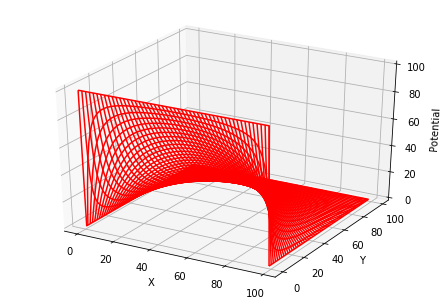

In [9]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""
   
# LaplaceLine.py:  Solve Laplace's eqtn, 3D matplot, close shell to quit
# 9 point stencil


import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D
from numpy import *;
import numpy;
print("Initializing")
omega=1.8
Nmax = 100; Niter = 2000; V = zeros((Nmax, Nmax), float)   

print ("Working hard, wait for the figure while I count to 60")
for k in range(0, Nmax-1):  V[k,0] = 100.0              # Line at 100V
    
for iter in range(Niter):                                  
    if iter%10 == 0: print(iter)
    maxerr=0.
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1): 
            du = 1./20.*(V[i-1,j+1]+V[i+1,j+1]+V[i-1,j-1]+V[i+1,j-1]+4.*(V[i,j+1]+V[i,j-1]+V[i-1,j]+V[i+1,j]))-V[i,j]
            if(maxerr<abs(du)):
                maxerr=abs(du)
            V[i,j] = V[i,j] + omega*du 
    print(maxerr)
    if(maxerr<1.e-3):
        break
            
x = range(0, Nmax, 1)
y = range(0, Nmax, 1)                              
X, Y = p.meshgrid(x,y)                 

def functz(V):                                         # V(x, y) 
    z = V[X,Y]                        
    return z

Z = functz(V)                          
fig = p.figure()                                      # Create figure
ax = Axes3D(fig)                                      # Plot axes
ax.plot_wireframe(X, Y, Z, color = 'r')               # Red wireframe
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
p.show()                                              # Show fig

## Multigrid method

Initializing
Working hard, wait for the figure while I count to 60
iter  0
size maxerr  129 19.413860073917327 48.15062017672565
before size 129 48.15062017672565 0.0
size maxerr  65 1.6941983407022931 0.8737302322708634
before size 65 0.8737302322708634 -0.07359572511287338
size maxerr  33 0.6287523805458939 2.2864825479430912
before size 33 2.2864825479430912 -0.05055967995015555
size maxerr  17 1.2586781885663403 4.475021691652504
before size 17 4.475021691652504 -0.026487651402959722
size maxerr  9 1.5139443455260353 5.892290792028862
before size 9 5.892290792028862 -0.008585125785531802
size maxerr  5 1.7501700030852068 3.4111706586627775
before size 5 3.4111706586627775 -0.000630871076925986
size maxerr  9 1.280510575950346 4.2807227202144595
after size  9 4.2807227202144595 -0.008585125785531802
size maxerr  17 0.8166015708946143 4.710615334174122
after size  17 4.710615334174122 -0.026487651402959722
size maxerr  33 0.5869975086865313 3.14398051941158
after size  33 3.143980519

size maxerr  129 0.0131458545160541 49.968132876806635
after size  129 49.968132876806635 0.0
V f  49.968132876806635 0.0
iter  7
size maxerr  129 0.00935024502123838 49.96869847525266
before size 129 49.96869847525266 0.0
size maxerr  65 0.005320306433676612 0.0007628429549355417
before size 65 0.0007628429549355417 -5.619350169716597e-05
size maxerr  33 0.011382230570985544 0.004615618376749552
before size 33 0.004615618376749552 -6.935319215447844e-05
size maxerr  17 0.017462492004436225 0.029411881538226242
before size 17 0.029411881538226242 -0.0001309295039437309
size maxerr  9 0.03294226517205544 0.13866989058255544
before size 9 0.13866989058255544 -0.00017463717745194637
size maxerr  5 0.043823172780707624 0.11549103984277387
before size 5 0.11549103984277387 -9.959358089812227e-05
size maxerr  9 0.02063645858046454 0.07977006795474467
after size  9 0.07977006795474467 -0.00017463717745194637
size maxerr  17 0.02371716531176729 0.050808223933544214
after size  17 0.05080822393

before size 9 0.006136648207131161 -6.1836663579589e-06
size maxerr  5 0.0020802650213726194 0.005606859902922602
before size 5 0.005606859902922602 -5.5586550866231695e-06
size maxerr  9 0.0010023646786043268 0.0032754713254563154
after size  9 0.0032754713254563154 -6.1836663579589e-06
size maxerr  17 0.0011511882380724151 0.0017173068927325021
after size  17 0.0017173068927325021 -1.7146869805470796e-06
size maxerr  33 0.0005235018257981373 0.0005824036683233997
after size  33 0.0005824036683233997 -1.1569854327422069e-06
size maxerr  65 0.0001722023613204525 0.00016158822652352175
after size  65 0.00016158822652352175 -7.346609378622304e-07
size maxerr  129 0.00024049504014556078 49.97320936599168
after size  129 49.97320936599168 0.0
V f  49.97320936599168 0.0
iter  14
size maxerr  129 0.0002202528452137642 49.97321163217014
before size 129 49.97321163217014 0.0
size maxerr  65 0.00014757653104295674 6.972841180579646e-06
before size 65 6.972841180579646e-06 -7.05166335102092e-07


size maxerr  129 1.1901467615871297e-05 49.97328087820597
after size  129 49.97328087820597 0.0
V f  49.97328087820597 0.0
iter  20
size maxerr  129 1.0823344517518763e-05 49.97328092596455
before size 129 49.97328092596455 0.0
size maxerr  65 7.128641082311196e-06 1.1505489398089317e-07
before size 65 1.1505489398089317e-07 -6.589470746831694e-09
size maxerr  33 1.6108495344769138e-05 -4.3420229402858495e-07
before size 33 -4.3420229402858495e-07 -2.6232571249178918e-09
size maxerr  17 2.6487576205108345e-05 9.493299912282973e-06
before size 17 9.493299912282973e-06 -5.15888286080236e-09
size maxerr  9 4.912587638764579e-05 0.00017152052893095298
before size 9 0.00017152052893095298 -1.4642524093768116e-07
size maxerr  5 6.011972168324776e-05 0.0001637549655762909
before size 5 0.0001637549655762909 -1.7165090732273037e-07
size maxerr  9 2.991792351904366e-05 8.765575376611399e-05
after size  9 8.765575376611399e-05 -1.4642524093768116e-07
size maxerr  17 3.414127062131432e-05 4.10549

size maxerr  33 7.592058232491784e-07 5.480446450939238e-07
after size  33 5.480446450939238e-07 3.4667159676555955e-10
size maxerr  65 2.419627050355831e-07 1.417290728379037e-07
after size  65 1.417290728379037e-07 -1.4624967903387187e-10
size maxerr  129 3.510282873264714e-07 49.97328354168112
after size  129 49.97328354168112 0.0
V f  49.97328354168112 0.0
iter  27
size maxerr  129 3.1845847558997775e-07 49.97328354201128
before size 129 49.97328354201128 0.0
size maxerr  65 2.0803331405219978e-07 1.3632465448950635e-09
before size 65 1.3632465448950635e-09 -8.242073690212237e-11
size maxerr  33 4.738150050794175e-07 -3.3139533019502706e-08
before size 33 -3.3139533019502706e-08 2.3694371182315725e-10
size maxerr  17 7.8838349729407e-07 1.7503887824104053e-07
before size 17 1.7503887824104053e-07 3.5214466463865244e-10
size maxerr  9 1.4415942099071134e-06 4.928389081984662e-06
before size 9 4.928389081984662e-06 -3.921420245187347e-09
size maxerr  5 1.748941646806358e-06 4.7818482

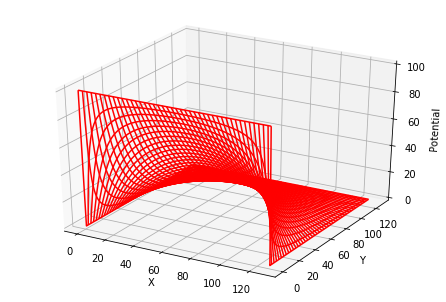

In [10]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""
   
# LaplaceLine.py:  Solve Laplace's eqtn, 3D matplot, close shell to quit


import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D
from numpy import *;
import numpy;
omega=1.9
   
def GSsolve(Arrin, f, size, h):
    Arr=Arrin
    N1=5
    Res=zeros((size,size), float)
    for iter in range(N1):  
        maxerr=0.
        for i in range(1, size-1):                                                
            for j in range(1,size-1):
                du = 0.25*(Arr[i+1,j]+Arr[i-1,j]+Arr[i,j+1]+Arr[i,j-1]-f[i,j]*h*h)-Arr[i,j]
                if(maxerr<abs(du)):
                    maxerr=abs(du)
                Arr[i,j] = Arr[i,j] + omega*du
    for i in range(1, size-1):                                                
        for j in range(1,size-1):
            Res[i,j]=f[i,j]-0.25*(Arr[i+1,j]+Arr[i-1,j]+Arr[i,j+1]+Arr[i,j-1]-4.*Arr[i,j])/h/h
    print('size maxerr ',size,maxerr,Arr[2,2])
    return (Res,Arr)

def Restrict(Arr, size):
    assert(size%2==1)
    sizeC = int((size-1)/2 + 1)
    Arrc=zeros((sizeC,sizeC),float)
    for i in range(0, sizeC): 
        Arrc[i,0]=Arr[i*2,0]
        Arrc[i,-1]=Arr[i*2,-1]
    for j in range(0, sizeC): 
        Arrc[0,j]=Arr[0,j*2]
        Arrc[-1,j]=Arr[-1,j*2]
    for i in range(1, sizeC-1): 
        for j in range(1, sizeC-1):
            Arrc[i,j]=0.25*(Arr[2*i,2*j]+0.5*(Arr[2*i-1,2*j]+Arr[2*i+1,2*j]+Arr[2*i,2*j-1]+Arr[2*i,2*j+1])+0.25*(Arr[2*i-1,2*j-1]+Arr[2*i-1,2*j+1]+Arr[2*i+1,2*j-1]+Arr[2*i+1,2*j+1]))
    return Arrc

def Prolong(Arr, size):
    sizeF = size*2-1
    Arrf=zeros((sizeF,sizeF),float)
    for i in range(0, size): 
        for j in range(0, size):
            Arrf[2*i,2*j]=Arr[i,j]
            if(i<size-1):
                Arrf[2*i+1,2*j]=0.5*(Arr[i,j]+Arr[i+1,j])
            if(j<size-1):
                Arrf[2*i,2*j+1]=0.5*(Arr[i,j]+Arr[i,j+1])
            if(i<size-1 and j<size-1):
                Arrf[2*i+1,2*j+1]=0.25*(Arr[i,j]+Arr[i+1,j]+Arr[i,j+1]+Arr[i+1,j+1])
    return Arrf

def vcycle(Arr, f, size, h):
    (Res,Arr)=GSsolve(Arr, f, size, h)
    print('before size', size, Arr[2,2],f[2,2])
    if(size < 8):
        return Arr
    Res2h=Restrict(Res, size)
    N2h=int((size-1)/2+1)    
    e2h=zeros((N2h,N2h),float)
    e2h=vcycle(e2h, Res2h, N2h, 2.*h)
    e2=Prolong(e2h, N2h)
    Arr=Arr+e2
    (Res,Arr)=GSsolve(Arr, f, size, h)
    print('after size ',size,Arr[2,2],f[2,2])
    return Arr

print("Initializing")
Nmax = 129; V = zeros((Nmax, Nmax), float)   
f=zeros((Nmax,Nmax),float)

print ("Working hard, wait for the figure while I count to 60")
for k in range(0, Nmax):  V[k,0] = 100.0              # Line at 100V
 
h=1
itermax=30
for iter in range(itermax):
    print('iter ',iter)
    V=vcycle(V,f,Nmax, h)
    print('V f ',V[2,2],f[2,2])
    
x = range(0, Nmax, 1)
y = range(0, Nmax, 1)                              
X, Y = p.meshgrid(x,y)                 

def functz(V):                                         # V(x, y) 
    z = V[X,Y]                        
    return z

Z = functz(V)                          
fig = p.figure()                                      # Create figure
ax = Axes3D(fig)                                      # Plot axes
ax.plot_wireframe(X, Y, Z, color = 'r')               # Red wireframe
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
p.show()   # Show fig


In [11]:
Vhighres = V

Initializing
Working hard, wait for the figure while I count to 60
0


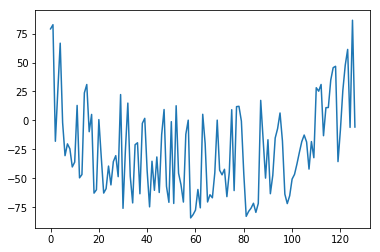

86.79596148388212
88.3158961648932
75.43616090407241
72.08219294295753
58.51165868790701
46.67188721821109
36.348104096169635
35.91667370152775
29.468580641619575
29.342408284227254
23.539411571666534
20.9041552262028
22.117224542199224
18.359626444620893
19.317374523233845
13.141994733072568
11.178464301616721
10.124624370024536
9.651520963100438
8.910090632241321
7.520682499577177
5.887278408042391
5.747509862324961
5.052008666808888
4.162127870549696
4.069661655800061
3.3693923490757527
3.0380700586458715
2.8034667687579145
2.5032182784125325
2.156506286477665
1.822100572050168
1.6813695405644324
1.5032051809426719
1.237870431184568
1.2293443677983582
1.156614183598478
1.0189374611539606
0.911759964117334
0.7951753495935208
0.7593975809933724
0.6611448114784935
0.6376577054913639
0.5813493806333945
0.5451040364606001
0.517584908023693
0.48810266903952737
0.4641967854977196
0.43981455392287216
0.4194003626835183
0.39886478329919584
0.3815981847542034
0.3642633442669947
0.349379564881

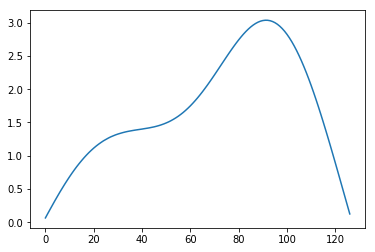

0.12781994239156802
0.12636612696503846
0.12492273952054944
0.12349383110589685
0.12210639969271142
0.1207497073790762
0.11943884742898092
0.11814610947746473
0.11686360119571759
0.11563177271578695
0.11441008001976627
0.11319923530273002
0.1120157702363116
0.11086026727775078
0.10974202489164497
0.1086388139736627
0.10754356474714655
0.10647935734902347
0.10543253930427454
0.10439322153281694
0.1033653003490187
0.10237048002305471
0.10139508329800151
0.10044235291535131
0.09949623728142143
0.0985612438611696
0.0976534260088755
0.09675172892804795
0.09585635121352709
0.09497715279729846
0.09411667450206807
0.09327916696443594
0.09245311182230864
0.09163241962829005
0.09082243034247739
0.09003214642007151
0.08924691601179546
0.08846690417151137
0.0876971011126102
0.08694491616147815
0.08621178583327804
0.08548820460912054
0.0847690882369534
0.08405456439079728
0.08335628410830509
0.08266583563236907
0.08197974441912237
0.08129810895580647
0.08063088302427701
0.07997434744698495
0.079334

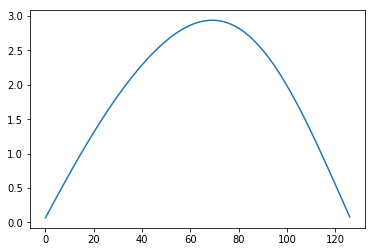

0.054635668580072405
0.05425795388372734
0.05388264236619733
0.05350974158362831
0.05313925787372753
0.0527735593012828
0.05241419960409743
0.052057108272279606
0.05170229105452506
0.05134975264748576
0.050999933419547006
0.05065519591847334
0.05031265854793432
0.04997232430137544
0.04963419529410018
0.049299687199511055
0.04897142768498597
0.048645240177211946
0.04832112665873467
0.04799908834838362
0.047679125735651695
0.04736123861363595
0.047045426110713606
0.04673365889351189
0.04642450656419683
0.04611735773537973
0.04581642532982855
0.045517942656481125
0.0452213451191561
0.04492663172098332
0.04463380093053004
0.04434285070612631
0.044053778518883036
0.04376658137499945
0.04348125583724993
0.04319863492914067
0.042921182709257266
0.04264549330319767
0.04237156367294759
0.04210070380992903
0.0418322163010707
0.04156543007876223
0.04130034165212493
0.041036947187269135
0.040775242523466204
0.04051522318816936
0.040257880005391655
0.04000480841992626
0.03975332615702243
0.03950342

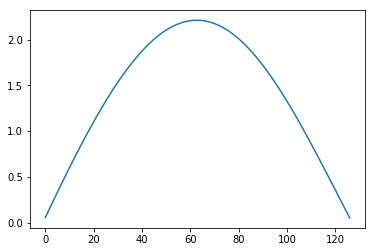

0.0289788458787541
0.028808660487740667
0.02864014699052575
0.028472768168349205
0.028306578245921088
0.028142935370791378
0.027980251648457966
0.027818522604878382
0.02765774373166252
0.027497910488587962
0.027339018305816865
0.02718106258624431
0.027024038707505582
0.02686794202421794
0.026712767869899068
0.02655851155880029
0.026405168388013323
0.026253381815450894
0.026103313891450597
0.025954115382173626
0.025805782024530544
0.0256583095382652
0.025511693627748855
0.025365929983394153
0.02522101428326806
0.02507694219449519
0.024933709374700186
0.02479131147329383
0.024649744132855034
0.0245090029903281
0.024369083678287495
0.024231190460678675
0.024094119473552666
0.023957832802672385
0.023822726182764598
0.02368849003813267
0.02355501624932188
0.02342230099581144
0.02329034045205347
0.023159130788403814
0.023028668172049294
0.022898948768037997
0.022769968740071533
0.02264172425135058
0.02251421146553767
0.02238742654739312
0.022262092885014795
0.02213776444504134
0.022014132306

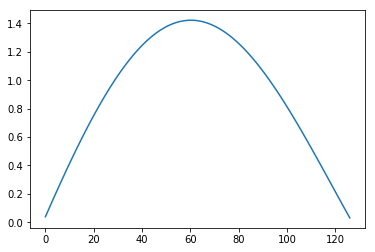

0.016500901130985568
0.016410764521150867
0.01632111456416041
0.01623194880760437
0.016143264806149915
0.016055060121733078
0.015967332323743477
0.015880078989077617
0.01579329770231297
0.015706986055846528
0.015621141649940995
0.015535762092909522
0.015450845001183211
0.015366387999403486
0.015282388720549989
0.01519884480599032
0.015115753905643459
0.015033113677933585
0.014950921790006788
0.014869175917702648
0.014787873745682134
0.014707012967502209
0.014626887526041799
0.014547275038911067
0.014468133123145321
0.014389524085181904
0.014311335070868125
0.014233563983545139
0.014156208733435705
0.014079267237800508
0.014002737421105138
0.013926617214860215
0.013850904557887844
0.013775597396307404
0.0137006936835391
0.0136261913804816
0.013552088455419664
0.013478382884223095
0.013405072650247263
0.013332155744500085
0.013259630165595837
0.013187493919858184
0.013115745021298864
0.013044381491692292
0.012973401360603987
0.012902802665404778
0.012832583451302781
0.012762741771389585


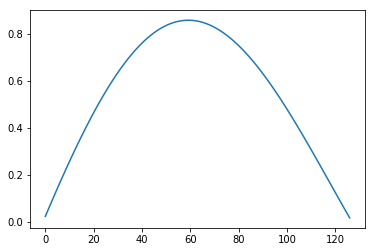

0.00956380370189791
0.009511878510593874
0.009460231391535956
0.009408860914945194
0.009357765657263428
0.009306944201370015
0.009256395136436169
0.009206122711962195
0.00915616323345958
0.009106471002692018
0.009057044648766777
0.009007882806756129
0.008958984117882096
0.008910347229360127
0.008861970794498575
0.00881385347259922
0.008765993929010563
0.00871839083508874
0.008671042868176215
0.008623948711630192
0.008577107054794197
0.008530516592919923
0.008484176027277357
0.008438084065030438
0.00839223941931877
0.00834664080915104
0.008301286959429888
0.008256176600994536
0.008211308470507106
0.008166681310530777
0.008122293869430308
0.00807814490143599
0.00803425996220497
0.0079906678634174
0.007947308914246776
0.007904181917059105
0.007861285679624075
0.007818619015083073
0.007776180741963401
0.007733969684110775
0.0076919846707390604
0.007650224536408956
0.007608688120949836
0.0075673742695521184
0.007526281832642923
0.00748540966598199
0.007444756630551552
0.007404321592645147
0

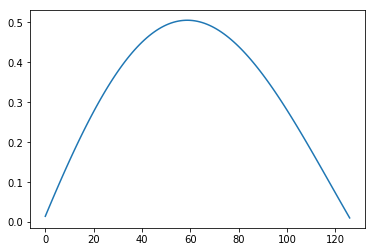

0.005545342643081597
0.0055151355419340575
0.005485091723951285
0.0054552103244773775
0.005425490483155215
0.005395931343880278
0.0053665320548859086
0.005337291768640284
0.005308209641892603
0.005279284835577158
0.005250516514895054
0.00522190384919341
0.005193461290438961
0.005165184907738762
0.005137061180562341
0.005109089303118708
0.00508126847355328
0.005053597894086437
0.005026076770771937
0.0049987043137207365
0.004971479736866513
0.004944402258153957
0.004917471099336268
0.0048906854860995
0.004864044647973742
0.004837547818347332
0.004811194234402905
0.004784983137209764
0.004758913771560458
0.004732985386080912
0.004707197233145166
0.004681548568896687
0.004656038653198635
0.004630666749640966
0.004605432125540432
0.004580334051848212
0.0045553718032707025
0.004530544658095437
0.004505851898304769
0.004481292809479953
0.004456866680868643
0.004432572805200152
0.004408410478934144
0.0043843790019550966
0.004360477677810337
0.00433670581350043
0.004313062719624838
0.0042895477

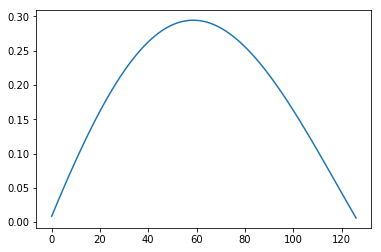

0.003209769368144322
0.003192243508703285
0.003174812967774443
0.0031574772321754097
0.0031402357914451784
0.0031230881377624087
0.003106033766009375
0.0030890721736795967
0.0030722028609275753
0.003055425330533268
0.0030387390878487963
0.003022143640912134
0.0030056385002339425
0.0029892231789929724
0.0029728971928868475
0.0029566600601604875
0.00294051130159545
0.002924450440499271
0.0029084770027267837
0.0028925905165380073
0.002876790512789995
0.0028610765247485404
0.002845448088148572
0.0028299047411621814
0.002814446024451911
0.0027990714810535167
0.0027837806564328105
0.002768573098453686
0.002753448357374566
0.0027384059858341914
0.00272344553883741
0.0027085665737196507
0.002693768650203765
0.0026790513302792363
0.0026644141783442876
0.002649856760982061
0.0026353786472022023
0.002620979408206381
0.0026066586174913198
0.0025924158508381367
0.0025782506862839227
0.0025641627040400294
0.0025501514866022035
0.0025362166186866375
0.002522357687183785
0.0025085742811903344
0.002494

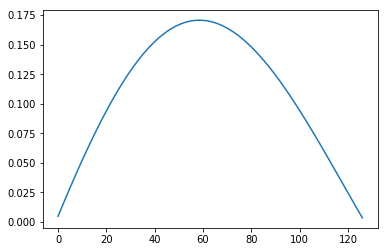

0.001855650702740519
0.0018455038141560465
0.0018354123173871528
0.0018253759113413537
0.0018153942965284386
0.001805467175099551
0.0017955942507796863
0.001785775228867692
0.0017760098163286386
0.001766297721609078
0.0017566386547933632
0.0017470323274757504
0.0017374784528350062
0.0017279767456130912
0.0017185269220085786
0.0017091286998329736
0.0016997817983970265
0.0016904859384823112
0.0016812408424122793
0.0016720462340025222
0.001662901838557218
0.0016538073828336053
0.001644762595127247
0.001635767205108607
0.001626820943965157
0.001617923544344535
0.0016090747402905947
0.0016002742673109083
0.0015915218623412386
0.0015828172636922488
0.0015741602111738473
0.0015655504459211045
0.0015569877104901764
0.0015484717488440936
0.0015400023063030233
0.0015315791295833492
0.001523201966755039
0.0015148705672523022
0.001506584681870038
0.0014983440627389655
0.00149014846333273
0.001481997638446586
0.001473891344232925
0.0014658293381124565
0.0014578113788807912
0.001449837226562778
0.00

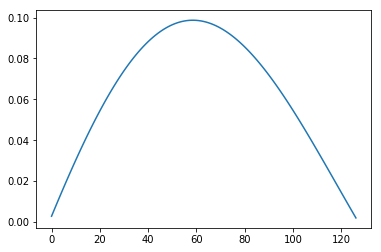

0.0010722211393527914
0.0010663544945579417
0.0010605199262556653
0.0010547173889747796
0.0010489466478311726
0.0010432074569699523
0.0010374996442337192
0.0010318230383781213
0.0010261774691109338
0.0010205627670600848
0.0010149787637416807
0.0010094252916452717
0.0010039021841166118
0.0009984092754287133


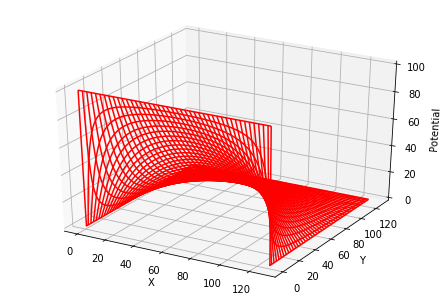

In [12]:
## Test iterative method error
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""
   
# LaplaceLine.py:  Solve Laplace's eqtn, 3D matplot, close shell to quit


import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D
from numpy import *;
import numpy;
print("Initializing")
omega=1.8
Nmax = 129; Niter = 5000; V = random.rand(Nmax,Nmax)*100.
V[0,:]=0.0
V[-1,:]=0.0
V[:,-1]=0.0

print ("Working hard, wait for the figure while I count to 60")
for k in range(0, Nmax):  V[k,0] = 100.0              # Line at 100V
    
for iter in range(Niter):                                  
    if iter%100 == 0: 
        print(iter)
        p.plot((V[1:(Nmax-1),10]-Vhighres[1:(Nmax-1),10]))
        p.show()
    maxerr=0.
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1): 
            du = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])-V[i,j]
            if(maxerr<abs(du)):
                maxerr=abs(du)
            V[i,j] = V[i,j] + omega*du 
    print(maxerr)
    if(maxerr<1.e-3):
        break
            
x = range(0, Nmax, 1)
y = range(0, Nmax, 1)                              
X, Y = p.meshgrid(x,y)                 

def functz(V):                                         # V(x, y) 
    z = V[X,Y]                        
    return z

Z = functz(V)                          
fig = p.figure()                                      # Create figure
ax = Axes3D(fig)                                      # Plot axes
ax.plot_wireframe(X, Y, Z, color = 'r')               # Red wireframe
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
p.show()                                              # Show fig


### Multigrid to solve general matrix problem

In [41]:
#! /usr/bin/env python
#
def vcycle ( A, f ):

#*****************************************************************************80
#
## VCYCLE performs one v-cycle on the matrix A.
#
#  Licensing:
#
#    This code is distributed under the GNU LGPL license. 
#
#  Modified:
#
#    02 October 2016
#
#  Author:
#
#    Mike Sussman
#
#  Parameters:
#
#    Input, A(*,*), the matrix.
#
#    Input, f(*), the right hand side.
#
#    Output, v(*), the solution of A*v=f.
#
  import numpy as np
  import scipy.linalg as la

  sizeF = np.size ( A, axis = 0 )
#
#  directSize=size for direct inversion
#
  if sizeF < 15:
    v = la.solve(A,f)
    return v
#
#  N1=number of Gauss-Seidel iterations before coarsening
#
  N1 = 5;
  v = np.zeros(sizeF);
  for numGS in range(N1):
    for k in range(sizeF):
      v[k] = (f[k] - np.dot(A[k,0:k], v[0:k]) \
                   -np.dot(A[k,k+1:], v[k+1:]) ) / A[k,k];
# 
#  construct interpolation operator from next coarser to this mesh
#  next coarser has ((n-1)/2 + 1 ) points
#
  assert(sizeF%2 ==1)
  sizeC =  int((sizeF-1)/2 +1)
  P = np.zeros((sizeF,sizeC));
#
#  Copy these points.
#
  for k in range(sizeC):
    P[2*k,k] = 1;
#
#  Average these points:
#
  for k in range(sizeC-1):
    P[2*k+1,k] = .5;
    P[2*k+1,k+1] = .5;
#
#  compute residual
#
  residual = f - np.dot(A,v)
#
#  project residual onto coarser mesh
#
  residC = np.dot(P.transpose(),residual)
#
#  Find coarser matrix  (sizeC X sizeC)
#
  AC = np.dot(P.transpose(),np.dot(A,P))

  vC = vcycle(AC,residC);
#
# extend to this mesh
#
  v = np.dot(P,vC)
#
#  N2=number of Gauss-Seidel iterations after coarsening
#
  N2 = 5;
  for numGS in range(N2):
    for k in range(sizeF):
      v[k] = (f[k] - np.dot(A[k,0:k], v[0:k]) \
                   - np.dot(A[k,k+1:], v[k+1:]) ) / A[k,k];
  return v

def vcycle_test ( ):

#*****************************************************************************80
#
## VCYCLE_TEST tests VCYCLE.
#
#  Licensing:
#
#    This code is distributed under the GNU LGPL license. 
#
#  Modified:
#
#    02 October 2016
#
#  Author:
#
#    Mike Sussman
#
  import numpy as np
  import platform
  import scipy.linalg as la

  print ( '' )
  print ( 'VCYCLE_TEST:' )
  print ( '  Python version: %s' % ( platform.python_version ( ) ) )
  print ( '  VCYCLE applies one V-cycle to a matrix.' )

  N = 2**11+1
  x = np.linspace(0,1,N);
  h = x[1]-x[0]
#
#  A is the [-1,2,-1]/h^2 tridiagonal matrix
#
  A = np.diag ( 2.0 * np.ones(N)       ) \
    - np.diag (       np.ones(N-1),  1 ) \
    - np.diag (       np.ones(N-1), -1 )

  A = A / h**2
#
#  The right hand side is a vector of 1's.
#
  f = np.ones ( N, dtype = float )
#
#  UDIRECT is the exact solution, from Gauss elimination.
#
  udirect = la.solve ( A, f )

  u = np.zeros(N) # initial guess

  for iters in range ( 100 ):
    r = f - np.dot(A,u)
    if la.norm(r)/la.norm(f) < 1.e-10:
      print ( 'VCYLE_TEST: Tolerance achieved.' )
      break
    du = vcycle(A, r)
    u += du

    print(iters+1, la.norm(u-udirect)/la.norm(udirect) )
#
#  Terminate.
#
  print ( '' )
  print ( 'VCYCLE_TEST:' )
  print ( '  Normal end of execution.' )
  return

def timestamp ( ):

#*****************************************************************************80
#
## TIMESTAMP prints the date as a timestamp.
#
#  Licensing:
#
#    This code is distributed under the GNU LGPL license. 
#
#  Modified:
#
#    06 April 2013
#
#  Author:
#
#    John Burkardt
#
#  Parameters:
#
#    None
#
  import time

  t = time.time ( )
  print ( time.ctime ( t ) )

  return None

def timestamp_test ( ):

#*****************************************************************************80
#
## TIMESTAMP_TEST tests TIMESTAMP.
#
#  Licensing:
#
#    This code is distributed under the GNU LGPL license. 
#
#  Modified:
#
#    03 December 2014
#
#  Author:
#
#    John Burkardt
#
#  Parameters:
#
#    None
#
  import platform

  print ( '' )
  print ( 'TIMESTAMP_TEST:' )
  print ( '  Python version: %s' % ( platform.python_version ( ) ) )
  print ( '  TIMESTAMP prints a timestamp of the current date and time.' )
  print ( '' )

  timestamp ( )
#
#  Terminate.
#
  print ( '' )
  print ( 'TIMESTAMP_TEST:' )
  print ( '  Normal end of execution.' )
  return

if ( __name__ == '__main__' ):
  timestamp ( )
  vcycle_test ( )
  timestamp ( )



Tue Feb 20 01:03:50 2018

VCYCLE_TEST:
  Python version: 3.6.3
  VCYCLE applies one V-cycle to a matrix.
1 0.19375864852488722
2 0.037621444372180575
3 0.007417581554750196
4 0.0015529652098113646
5 0.0003782356430437982
6 0.00011261359989080355
7 3.808543660557306e-05
8 1.3466282332383022e-05
9 4.808142872510677e-06
10 1.7171804334682084e-06
11 6.123136015873487e-07
12 2.1800187332806868e-07
13 7.751897139475769e-08
14 2.7537655733554733e-08
15 9.77433969200904e-09
16 3.4668364809523252e-09
17 1.2288121568214472e-09
18 4.3527155306133844e-10
19 1.540968199286905e-10
20 5.454685046377418e-11
21 1.9325412336164292e-11
22 6.8692336709502036e-12
VCYLE_TEST: Tolerance achieved.

VCYCLE_TEST:
  Normal end of execution.
Tue Feb 20 01:03:57 2018


Initializing
0
3.777765165941726
2.827433388230814
1.9085175370557996
1.7176657833502198
1.288249337512665
1.1594244037613985
0.9130467179621014
0.8217420461658912
0.6656110573943719
0.5990499516549347
10
0.49421621011532113
0.44479458910378905
0.37172119232245227
0.33454907309020704
0.28227578041986223
0.254048202377876
0.2159409720211946
0.19434687481907514
0.16616657797030926
0.14954992017327834
20
0.12847697687613457
0.11562927918852112
0.09973025330009946
0.08975722797008952
0.07767452420488516
0.06990707178439665
0.06066935158431566
0.0546024164258841
0.04750410229051917
0.04275369206146726
30
0.03727587526609177
0.03354828773948259
0.029305416054783325
0.026374874449304992
0.023078015143141867
0.02109564834612814
0.01904410592818384
0.01843886924100291
0.01776946120846934
0.0172249337981647
40
0.01665374795531771
0.01616767127837626
0.01566631818644426
0.015233872715558539
0.014784987796049753
0.014400538818483799
0.01399733040406792
0.013650913328290049
0.01329265256117318
0.01

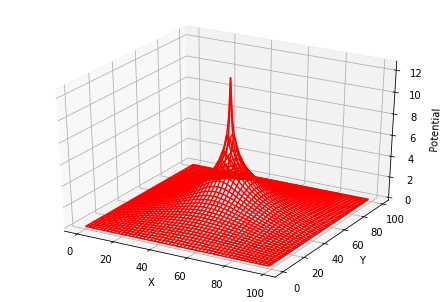

In [38]:
# Homework


import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D
from numpy import *;
import numpy;
print("Initializing")
G = 1.
fourpiG = 4 * np.pi*G
omega= 1.8
Nmax = 100; Niter = 3000; V = zeros((Nmax, Nmax), float)
rho = 1

V[50,50] = fourpiG * rho

for iter in range(Niter):                                  
    if iter%10 == 0: print(iter)
    maxerr=0.
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1): 
            if not (i==50 and j ==50):
                du = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])-V[i,j]
                if(maxerr<abs(du)):
                    maxerr=abs(du)
                V[i,j] += omega*du
    print(maxerr)
    if(maxerr<1.e-3):
        break

x = range(0, Nmax, 1)
y = range(0, Nmax, 1)                              
X, Y = p.meshgrid(x,y)                 

def functz(V):                                         # V(x, y) 
    z = V[X,Y]                        
    return z

Z = functz(V)                          
fig = p.figure()                                      # Create figure
ax = Axes3D(fig)                                      # Plot axes
ax.plot_wireframe(X, Y, Z, color = 'r')               # Red wireframe
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
p.show()                                              # Show fig

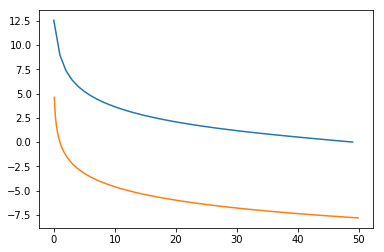

In [46]:
plt.plot(np.arange(0,50),V[50,50:])
x = np.arange(0.1,50,0.1)
y = -2*G*rho*log(x)
plt.plot(x,y)

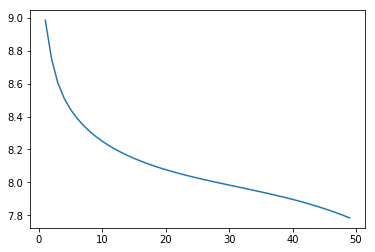

In [48]:
x = np.arange(1,50)
y = -2*G*rho*log(x)
error = abs(y - V[50,51:])
plt.plot(x,error)